<a href="https://colab.research.google.com/github/sinhoodoowu/MATL-6970-Machine-Learning-and-Materials/blob/main/Final_project_Shuai_Wu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Get and clean My data.**

In [113]:
my_API = "xWlhVFOsdCmNK6f1sasbDlTt6KEUU2uj"
# Sign up at materialsproject.org and get your API: https://materialsproject.org/api#api-key

In [114]:
#Install Pymatgen
!pip install pymatgen
import pandas as pd
from pymatgen.ext.matproj import MPRester
with MPRester(my_API) as mpr:
  docs = mpr.summary.search(num_elements = [2,2],exclude_elements = ['Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf', 'Es', 'Fm', 'Md', 'No', 'Lr', 'Rf', 'Db', 'Sg', 'Bh', 'Hs', 'Mt', 'Ds', 'Rg', 'Cn', 'Nh', 'Fl', 'Mc', 'Lv', 'Ts', 'Og'],
                               is_stable=True,
                              fields=["material_id",
                                      "band_gap",
                                      "density_atomic","formation_energy_per_atom","formula_pretty"])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.10/dist-packages/mp_api/client/mprester.py:182: UserWarning: mpcontribs-client not installed. Install the package to query MPContribs data, or construct pourbaix diagrams: 'pip install mpcontribs-client'
  warnings.warn(


Retrieving SummaryDoc documents:   0%|          | 0/5149 [00:00<?, ?it/s]

In [115]:
#Let's look at what we got: compositions
formula = [doc.formula_pretty for doc in docs]
len(formula)
print(formula)

['Mg149Tc', 'K5As4', 'CuS2', 'Sm14Ag51', 'GdB6', 'Th2C3', 'YIr', 'TmSe2', 'ZrCr2', 'CaCu5', 'NdOs2', 'Ho2S3', 'NiCl2', 'SnRh', 'Zr7Pt10', 'Nd5Co2', 'Ac2O3', 'Er13Zn58', 'Au3F8', 'EuMg2', 'P4S3', 'Tm3Ru', 'GdSe2', 'Tl7Sb2', 'Ho2In', 'TaSi2', 'Ti2O', 'La5Ru2', 'Dy13Zn58', 'Zn3N2', 'In4Te3', 'TaAs', 'EuPb', 'BeH2', 'ZrSe2', 'SmH2', 'Ag3Pd', 'Tb11Sn10', 'Ti2Pd', 'Yb3Ge8', 'Li17Sn4', 'EuHg3', 'Ca5Au3', 'Sr3P4', 'Mg149In', 'NaCl7', 'Nb3B4', 'PtPb4', 'U3Sb4', 'TbBr3', 'BaF3', 'Yb5Pt3', 'Sb2Os', 'Th2Se3', 'PrSe2', 'Nb5Sb4', 'TeI', 'Nb2Pd', 'Tb2Co17', 'Ho2C', 'Rb4Ge23', 'TbZn2', 'HoHg3', 'GaBr3', 'BaMg', 'RbI', 'Tm3Ir', 'Zr3In', 'CrRh3', 'TmB2', 'Pr5Bi3', 'Dy3Ga5', 'DyRe2', 'Ba3N', 'Tm5Rh3', 'Cd41Ir8', 'CoSb', 'Pa3Te', 'Ca5Si3', 'Y2Se3', 'CsGa3', 'FePt3', 'Mo5As4', 'Ag3Sb', 'Lu2Se3', 'Nb2B3', 'ZrRh3', 'Yb2Ni7', 'BaZn2', 'PmHg3', 'In2O3', 'Tm11Cd45', 'TbIr2', 'Nd5Rh4', 'CrPt3', 'AlV3', 'PrMg', 'Zr2Al3', 'GaCo', 'MgTl', 'Li3Cd', 'Dy3Rh2', 'Cs3P7', 'La7Ru3', 'PrTl', 'Tl2O', 'Tc2As3', 'EuS2', 'Yb5A

In [116]:
import pandas as pd
D={'density_atomic':[],'band_gap':[],'material_id':[],'formula':[],'formation_energy_per_atom':[]}

for doc in docs:
      D['density_atomic'].append(doc.density_atomic)
      D['band_gap'].append(doc.band_gap)
      D['material_id'].append(doc.material_id)
      D['formula'].append(doc.formula_pretty)
      D['formation_energy_per_atom'].append(doc.formation_energy_per_atom)
      #D['volume'].append(doc.volume)
      #D['structure'].append(doc.structure)
mp_query = pd.DataFrame(D)


In [117]:
mp_query.info()
mp_query.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5149 entries, 0 to 5148
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   density_atomic             5149 non-null   float64
 1   band_gap                   5149 non-null   float64
 2   material_id                5149 non-null   object 
 3   formula                    5149 non-null   object 
 4   formation_energy_per_atom  5149 non-null   float64
dtypes: float64(3), object(2)
memory usage: 201.3+ KB


,density_atomic,band_gap,material_id,formula,formation_energy_per_atom
0,22.877356,0.0978,mp-1185636,Mg149Tc,-0.018674
1,32.273652,0.0000,mp-1223503,K5As4,-0.437151
2,16.316454,0.0000,mp-849086,CuS2,-0.432674
3,20.401661,0.0000,mp-1219378,Sm14Ag51,-0.246306
4,9.856148,0.0000,mp-22266,GdB6,-0.456620


In [118]:
# How many unique compositions do we have?
mp_query["formula"].astype("string").unique()

<StringArray>
[ 'Mg149Tc',    'K5As4',     'CuS2', 'Sm14Ag51',     'GdB6',    'Th2C3',
      'YIr',    'TmSe2',    'ZrCr2',    'CaCu5',
 ...
    'ZrCl4',     'ZrF4',    'YbAu2',     'MgRh',    'Pr2O3',     'FeCo',
    'NiBr2',    'Rh2S3',    'CeMg3',    'Pm3Si']
Length: 5149, dtype: string

In [119]:
# Load the periodic table data
periodic_table = pd.read_csv("periodic_table_final.csv")
periodic_table.set_index("Symbol", inplace=True)
periodic_table.head(100)

,Unnamed: 0,AtomicNumber,Element,AtomicMass,NumberofNeutrons,NumberofProtons,NumberofElectrons,Period,Group,Phase,...,Nonmetal,Metalloid,Type,AtomicRadius,Electronegativity,FirstIonization,Density,MeltingPoint,BoilingPoint,NumberOfIsotopes
Symbol,,,,,,,,,,,,,,,,,,,,,
H,0,1.0,Hydrogen,1.007,0.0,1.0,1.0,1.0,1.0,gas,...,yes,NaN,Nonmetal,0.79,2.20,13.5984,0.000090,14.175,20.28,3.0
He,1,2.0,Helium,4.002,2.0,2.0,2.0,1.0,18.0,gas,...,yes,NaN,Noble Gas,0.49,0.00,24.5874,0.000179,0.950,4.22,5.0
Li,2,3.0,Lithium,6.941,4.0,3.0,3.0,2.0,1.0,solid,...,NaN,NaN,Alkali Metal,2.10,0.98,5.3917,0.534000,453.850,1615.00,5.0
Be,3,4.0,Beryllium,9.012,5.0,4.0,4.0,2.0,2.0,solid,...,NaN,NaN,Alkaline Earth Metal,1.40,1.57,9.3227,1.850000,1560.150,2742.00,6.0
B,4,5.0,Boron,10.811,6.0,5.0,5.0,2.0,13.0,solid,...,NaN,yes,Metalloid,1.20,2.04,8.2980,2.340000,2573.150,4200.00,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cm,95,96.0,Curium,247.000,151.0,96.0,96.0,7.0,NaN,artificial,...,NaN,NaN,Actinide,NaN,1.30,5.9915,13.500000,1340.150,3383.00,133.0
Bk,96,97.0,Berkelium,247.000,150.0,97.0,97.0,7.0,NaN,artificial,...,NaN,NaN,Actinide,NaN,1.30,6.1979,14.800000,1259.150,983.00,83.0
Cf,97,98.0,Californium,251.000,153.0,98.0,98.0,7.0,NaN,artificial,...,NaN,NaN,Actinide,NaN,1.30,6.2817,15.100000,1925.150,1173.00,123.0


# **2. Create new features.**

In [120]:
# Iterate through the chemical formulas,get the features like composition_averaged_atomic_radius,composition_averaged_FirstIonization,Electronegativity_dif and so on (12 features in total)
from pymatgen.core import Composition
for formula in mp_query["formula"]:
  #print(formula)
 composition = Composition(formula)
 elements = composition.elements
 element1 = elements[0]  # Assuming 'elements' contains the two elements
 element2 = elements[1]
 Electronegativity1 = periodic_table.loc[element1.symbol]["Electronegativity"]
 Electronegativity2 = periodic_table.loc[element2.symbol]["Electronegativity"]
 Electronegativity_dif = abs(Electronegativity1 - Electronegativity2)
 atomic_radius1 = periodic_table.loc[element1.symbol]["AtomicRadius"]
 atomic_radius2 = periodic_table.loc[element2.symbol]["AtomicRadius"]
 atomic_radius_dif = abs(atomic_radius1 - atomic_radius2)
 Electronegativity_dif = abs(Electronegativity1 - Electronegativity2)
 composition_averaged_atomic_radius = sum(periodic_table.loc[el.symbol]["AtomicRadius"] * composition.get_atomic_fraction(el) for el in elements)
 composition_averaged_FirstIonization	 = sum(periodic_table.loc[el.symbol]["FirstIonization"] * composition.get_atomic_fraction(el) for el in elements)
 composition_averaged_MeltingPoint	 = sum(periodic_table.loc[el.symbol]["MeltingPoint"] * composition.get_atomic_fraction(el) for el in elements)
 composition_averaged_BoilingPoint	 = sum(periodic_table.loc[el.symbol]["BoilingPoint"] * composition.get_atomic_fraction(el) for el in elements)
 composition_averaged_Electronegativity	 = sum(periodic_table.loc[el.symbol]["Electronegativity"] * composition.get_atomic_fraction(el) for el in elements)
 composition_averaged_Density	 = sum(periodic_table.loc[el.symbol]["Density"] * composition.get_atomic_fraction(el) for el in elements)
 total_electrons = sum(periodic_table.loc[el.symbol]["NumberofElectrons"] * composition.get_atomic_fraction(el) * composition.num_atoms  for el in elements)
 #total_mass = sum(periodic_table.loc[el.symbol]["AtomicMass"] * composition.get_atomic_fraction(el) * composition.num_atoms  for el in elements)
 #total_neutrons = sum(periodic_table.loc[el.symbol]["NumberofNeutrons"] * composition.get_atomic_fraction(el) * composition.num_atoms  for el in elements)

 #composition_averaged_atomic_radius = atomic_radius_sum / len(elements)
 mp_query.loc[mp_query["formula"] == formula, "composition-averaged AtomicRadius"] = composition_averaged_atomic_radius
 mp_query.loc[mp_query["formula"] == formula, "Electronegativity_dif"] = Electronegativity_dif
 mp_query.loc[mp_query["formula"] == formula, "atomic_radius_dif"] = atomic_radius_dif
 mp_query.loc[mp_query["formula"] == formula, "composition_averaged_FirstIonization"] = composition_averaged_FirstIonization
 mp_query.loc[mp_query["formula"] == formula, "composition_averaged_BoilingPoint"] = composition_averaged_BoilingPoint
 mp_query.loc[mp_query["formula"] == formula, "composition_averaged_MeltingPoint"] = composition_averaged_MeltingPoint
 mp_query.loc[mp_query["formula"] == formula, "composition_averaged_Electronegativity"] = composition_averaged_Electronegativity
 mp_query.loc[mp_query["formula"] == formula, "composition_averaged_Density"] = composition_averaged_Density
 mp_query.loc[mp_query["formula"] == formula, "total_electrons"] = total_electrons
 #mp_query.loc[mp_query["formula"] == formula, "total_mass"] = total_mass
 #mp_query.loc[mp_query["formula"] == formula, " total_neutrons"] =  total_neutrons
 #mp_query.loc[mp_query["formula"] == formula, "atomic_radius_sum"] = atomic_radius_sum

# Print the composition-averaged atomic radius
#print(f"Composition-averaged AtomicRadius for {formula}: {composition_averaged_atomic_radius}")


In [121]:
mp_query

,density_atomic,band_gap,material_id,formula,formation_energy_per_atom,composition-averaged AtomicRadius,Electronegativity_dif,atomic_radius_dif,composition_averaged_FirstIonization,composition_averaged_BoilingPoint,composition_averaged_MeltingPoint,composition_averaged_Electronegativity,composition_averaged_Density,total_electrons
0,22.877356,0.0978,mp-1185636,Mg149Tc,-0.018674,1.702000,0.59,0.3,7.643759,1388.246667,933.483333,1.313933,1.805067,1831.0
1,32.273652,0.0000,mp-1223503,K5As4,-0.437151,2.133333,1.36,1.5,6.761989,967.555556,671.455556,1.424444,3.047778,227.0
2,16.316454,0.0000,mp-849086,CuS2,-0.432674,1.266667,0.68,0.5,9.482133,1423.533333,711.590000,2.353333,4.366667,61.0
3,20.401661,0.0000,mp-1219378,Sm14Ag51,-0.246306,1.972308,0.76,0.8,7.159969,2355.738462,1258.057692,1.766308,9.858154,3265.0
4,9.856148,0.0000,mp-22266,GdB6,-0.456620,1.385714,0.84,1.3,7.991157,4106.571429,2432.007143,1.920000,3.134286,94.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5144,11.441373,0.0000,mp-2090,FeCo,-0.067924,1.700000,0.05,0.0,7.891700,3167.000000,1788.150000,1.855000,8.365000,53.0
5145,25.352645,0.3454,mp-27637,NiBr2,-0.807626,1.266667,1.05,0.5,10.422467,1283.333333,752.750000,2.610000,5.050000,98.0
5146,15.750457,0.1918,mp-17173,Rh2S3,-0.762207,1.380000,0.30,0.7,9.199560,2017.880000,1128.766000,2.460000,6.202000,138.0
5147,25.068820,0.0000,mp-1798,CeMg3,-0.028329,1.950000,0.19,1.0,7.119325,1951.250000,960.150000,1.262500,2.997500,94.0


In [122]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
mp_query.drop(['material_id','formula'],axis=1,inplace=True)#drop material_id and formula


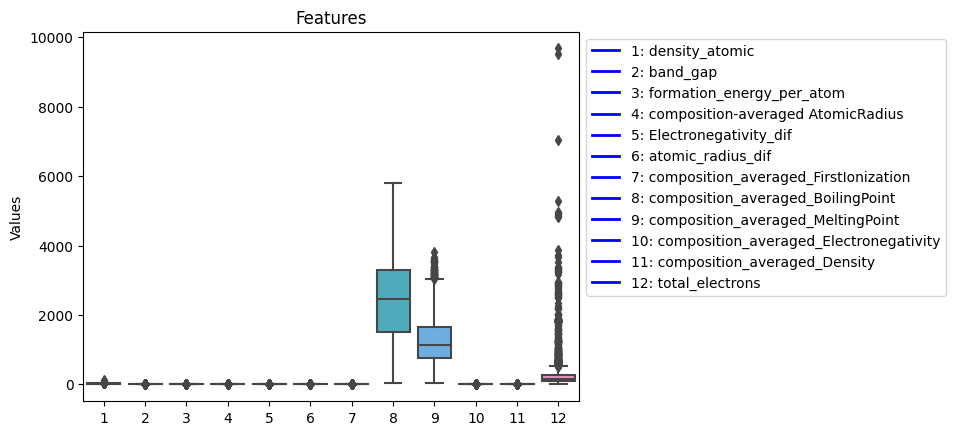

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

column_list = mp_query.columns.tolist()

ax = sns.boxplot(data=mp_query)

tick_values = range(len(column_list))
tick_labels = [str(i+1) for i in tick_values]

plt.xticks(tick_values, tick_labels)

# Add title and labels
plt.title('Features')
plt.ylabel('Values')

box_patches = [plt.Line2D([0], [0], color='blue', lw=2, label=f'{i+1}: {column_list[i]}') for i in tick_values]

# Add the legend to the plot
plt.legend(handles=box_patches, loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


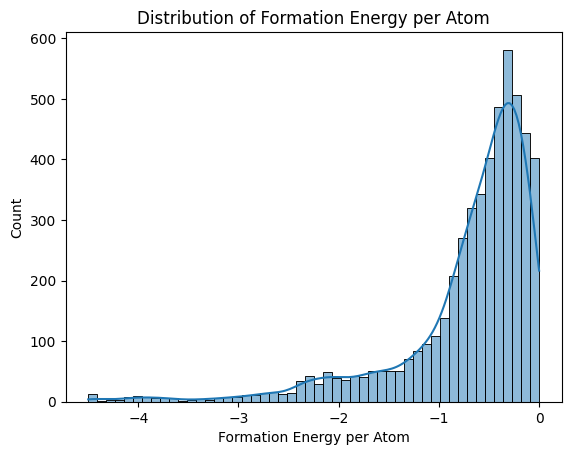

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=mp_query, x='formation_energy_per_atom', bins=50, kde=True)
plt.xlabel('Formation Energy per Atom')
plt.ylabel('Count')
plt.title('Distribution of Formation Energy per Atom')
plt.show()

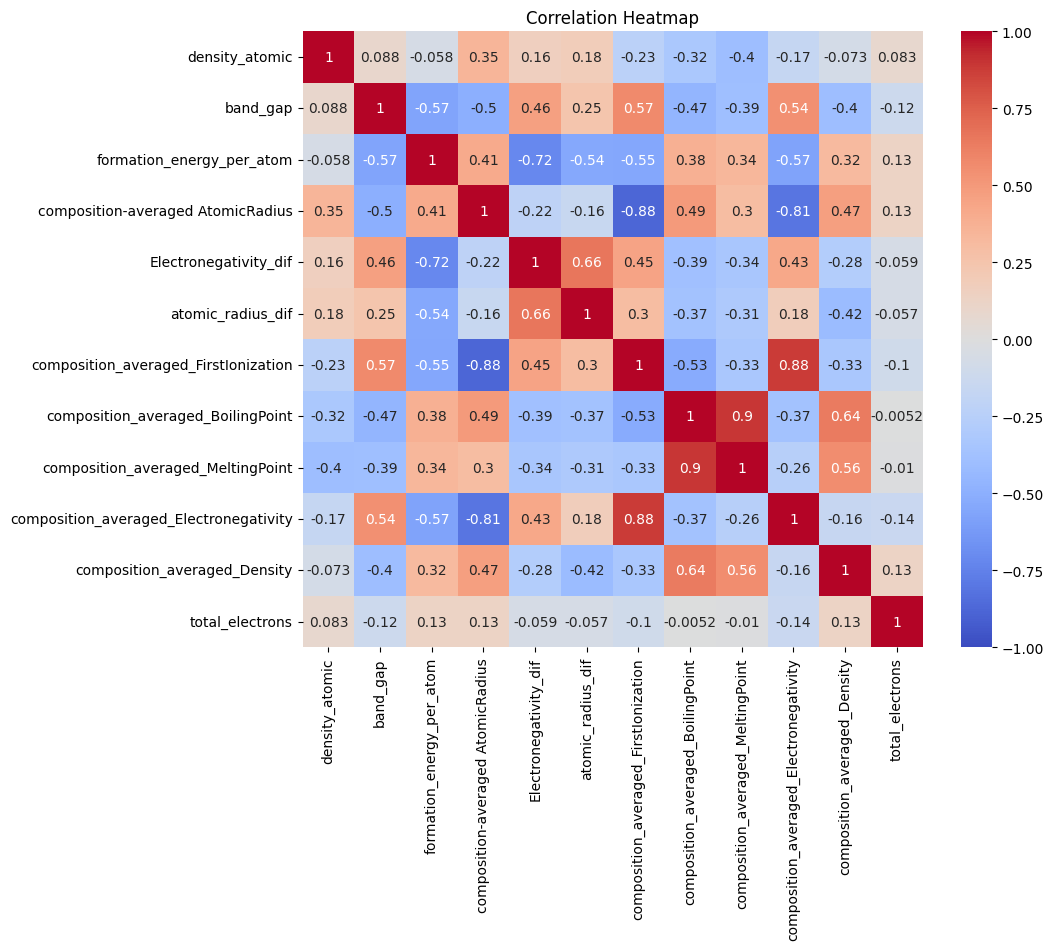

Top 3 strongest correlations with formation_energy_per_atom:
Electronegativity_dif                    -0.717962
composition_averaged_Electronegativity   -0.572075
band_gap                                 -0.567491
Name: formation_energy_per_atom, dtype: float64


In [125]:
# Step 4: Plot heatmap to explore correlations
corr_matrix = mp_query.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# Identify top 3 strongest correlations
top_correlations = corr_matrix.abs().nlargest(4, 'formation_energy_per_atom')['formation_energy_per_atom'].index[1:]  # Exclude 'tensile strength'
strongest_correlations = corr_matrix.loc[top_correlations, 'formation_energy_per_atom']
print("Top 3 strongest correlations with formation_energy_per_atom:")
print(strongest_correlations)

# **3. Building Regression and Classification models.**

# **Linear regression**

R2 Score: 0.6854871227650383
Mean Squared Error: 0.1740626465498487
Mean Absolute Error: 0.2975941488778541


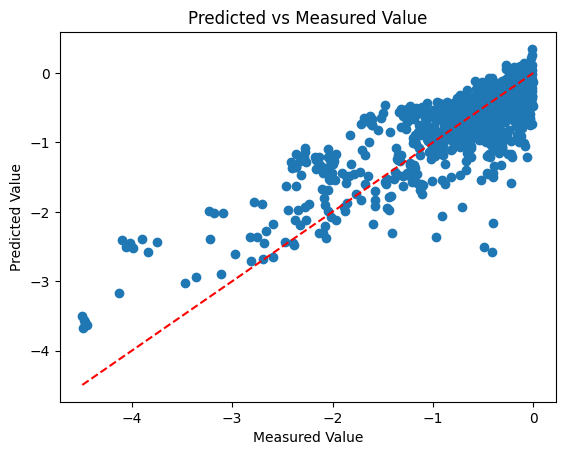

In [126]:
#put your code here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
# Assuming you have your dataset with features and target variable
# X - feature matrix (concentration of elements)
# y - target variable (tensile strength)
X = mp_query.drop(['formation_energy_per_atom'], axis=1)
y = mp_query['formation_energy_per_atom']

# Splitting the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 1: Define your Linear Regression model
model = LinearRegression()

# Step 2: Define the parameter grid you want to search over
param_grid = {
    'fit_intercept': [True, False]
}

# Step 3: Create a GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Step 4: Fit the GridSearchCV object to your training data
grid_search.fit(X_train, y_train)

# Step 5: Get the best parameters and best estimator from the GridSearchCV
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Step 6: Evaluate the best model on the testing set
pred_y_linear = best_estimator.predict(X_test)

r2 = r2_score(y_test, pred_y_linear)
mse = mean_squared_error(y_test, pred_y_linear)
mae = mean_absolute_error(y_test, pred_y_linear)

print('R2 Score:', r2)
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)

# Step 7: Plot predicted value vs measured value
plt.scatter(y_test, pred_y_linear)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Measured Value')
plt.ylabel('Predicted Value')
plt.title('Predicted vs Measured Value')
plt.show()



In [127]:
# Get the coefficients and corresponding feature names
coefficients = best_estimator.coef_
feature_names = X.columns

# Create a dictionary to store the feature coefficients
feature_coefficients = dict(zip(feature_names, coefficients))

# Sort the feature coefficients in descending order of absolute magnitude
sorted_coefficients = sorted(feature_coefficients.items(), key=lambda x: abs(x[1]), reverse=True)

# Print the features with the strongest effect on the predicted properties
print("Features with the strongest effect on predicted properties:")
for feature, coefficient in sorted_coefficients:
    print(f"{feature}: {coefficient}")




Features with the strongest effect on predicted properties:
composition_averaged_Electronegativity: -0.6237318648165773
Electronegativity_dif: -0.4790278264384531
atomic_radius_dif: -0.3398812223877935
band_gap: -0.13547599817987108
composition-averaged AtomicRadius: -0.09821477227105742
composition_averaged_FirstIonization: 0.04404918230491626
composition_averaged_Density: 0.01063238801105076
density_atomic: 0.003825030749802147
composition_averaged_MeltingPoint: 0.000148747337632385
composition_averaged_BoilingPoint: -9.158243965240453e-05
total_electrons: 1.9351826811186273e-05


# **Lasso**

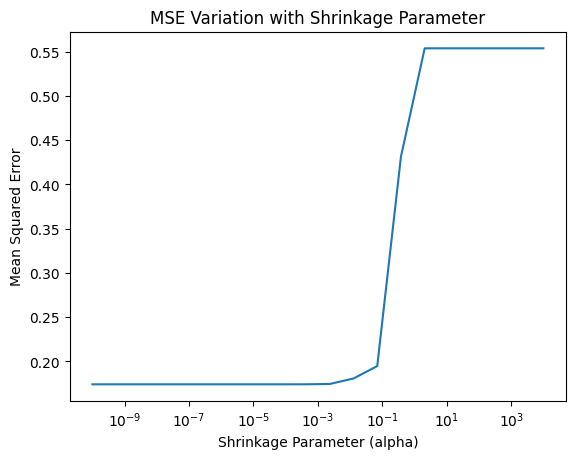

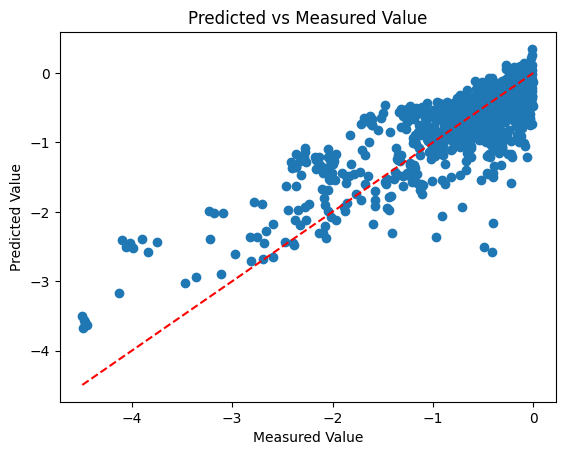

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
# Scale the inputs using StandardScaler
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(X_train)
test_X_scaled = scaler.transform(X_test)

#  Vary the shrinkage parameter and evaluate MSE
shrinkage_params = np.logspace(-10, 4, 20)
mse_values = []

for alpha in shrinkage_params:
    model = Lasso(alpha=alpha, random_state=42)
    model.fit(train_X_scaled, y_train)
    pred_y = model.predict(test_X_scaled)
    mse = mean_squared_error(y_test, pred_y)
    mse_values.append(mse)

#  Plot MSE variation with shrinkage parameter
plt.plot(shrinkage_params, mse_values)
plt.xscale('log')
plt.xlabel('Shrinkage Parameter (alpha)')
plt.ylabel('Mean Squared Error')
plt.title('MSE Variation with Shrinkage Parameter')
plt.show()

#  Choose the optimal shrinkage parameter and build a new model
optimal_alpha = shrinkage_params[np.argmin(mse_values)]
model = Lasso(alpha=optimal_alpha, random_state=42)
model.fit(train_X_scaled, y_train)
pred_y = model.predict(test_X_scaled)

#  Plot predicted value vs measured value
plt.scatter(y_test, pred_y)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Measured Value')
plt.ylabel('Predicted Value')
plt.title('Predicted vs Measured Value')
plt.show()


In [130]:

#  Get the absolute coefficients of the features
coefficients = np.abs(model.coef_)

#  Pair the coefficients with the feature names
feature_coefficients = dict(zip(feature_names, coefficients))

#  Sort the feature coefficients in descending order
sorted_coefficients = sorted(feature_coefficients.items(), key=lambda x: x[1], reverse=True)

#  Get the feature with the strongest effect and its corresponding coefficient
strongest_feature = sorted_coefficients[0][0]
strongest_coefficient = sorted_coefficients[0][1]

#  Print the feature with the strongest effect and its coefficient
print("Strongest Feature:", strongest_feature)
print("Strongest Coefficient:", strongest_coefficient)

Strongest Feature: composition_averaged_Electronegativity
Strongest Coefficient: 0.28951054791643493


# **Decision Tree**

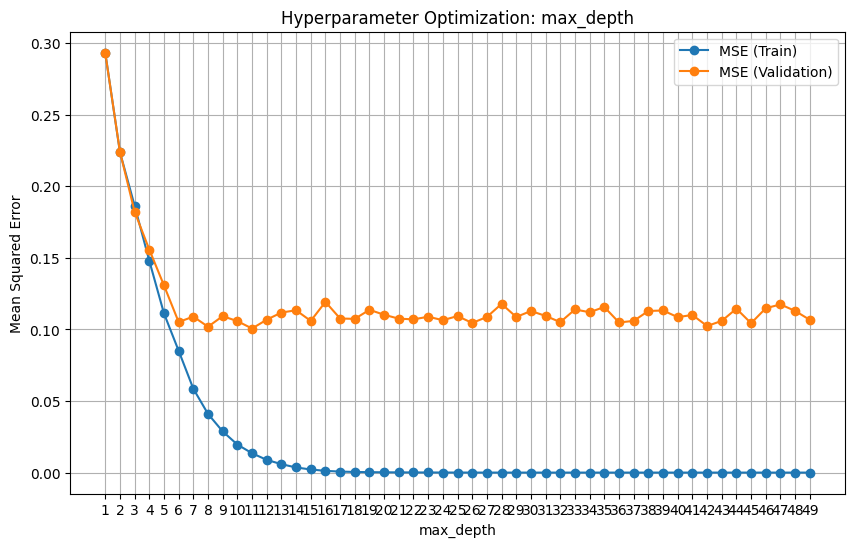

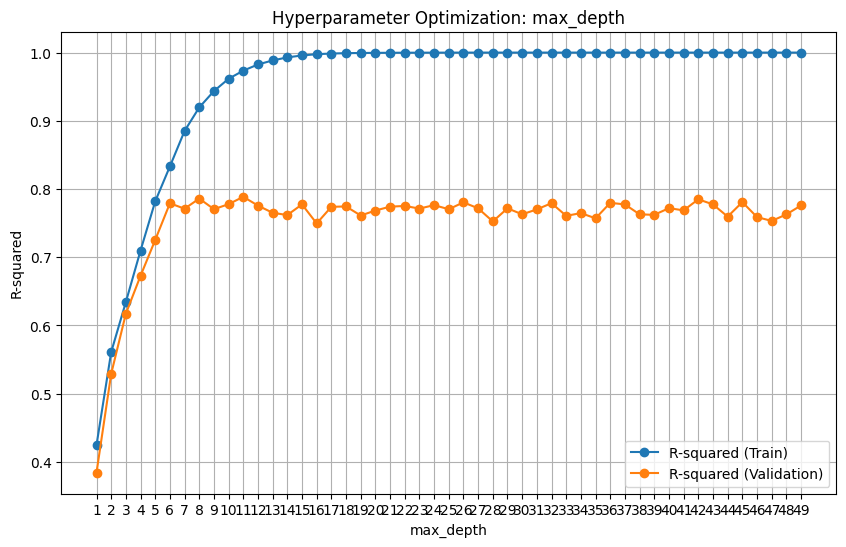

In [131]:
#put your code here
import numpy as np
# Define a range of max_depth values to try
max_depth_values = range(1, 50)
# Initialize lists to store MSE and R-squared values for train, validation, and test sets
mse_train_values = []
r2_train_values = []
mse_val_values = []
r2_val_values = []
# Hyperparameter optimization loop
for max_depth in max_depth_values:
    # Create and train the decision tree regression model
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(X_train, y_train)
    # Make predictions on the train set
    y_train_pred = model.predict(X_train)
    # Compute MSE and R-squared for train set
    mse_train = mean_squared_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    # Make predictions on the validation set
    y_val_pred = model.predict(X_val)
    # Compute MSE and R-squared for validation set
    mse_val = mean_squared_error(y_val, y_val_pred)
    r2_val = r2_score(y_val, y_val_pred)
    # Append the results to the lists
    mse_train_values.append(mse_train)
    r2_train_values.append(r2_train)
    mse_val_values.append(mse_val)
    r2_val_values.append(r2_val)
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mse_train_values, 'o-', label='MSE (Train)')
plt.plot(max_depth_values, mse_val_values, 'o-', label='MSE (Validation)')
plt.xlabel('max_depth')
plt.ylabel('Mean Squared Error')
plt.title('Hyperparameter Optimization: max_depth')
plt.xticks(max_depth_values)
plt.grid(True)
plt.legend()
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, r2_train_values, 'o-', label='R-squared (Train)')
plt.plot(max_depth_values, r2_val_values, 'o-', label='R-squared (Validation)')
plt.xlabel('max_depth')
plt.ylabel('R-squared')
plt.title('Hyperparameter Optimization: max_depth')
plt.xticks(max_depth_values)
plt.grid(True)
plt.legend()
plt.show()

Mean Squared Error VALIDATION: 0.10744096600323753
R-squared VALIDATION: 0.7741355629821154
Mean Squared Error TESTING: 0.09015536617931037
R-squared TESTING: 0.8370987447493161


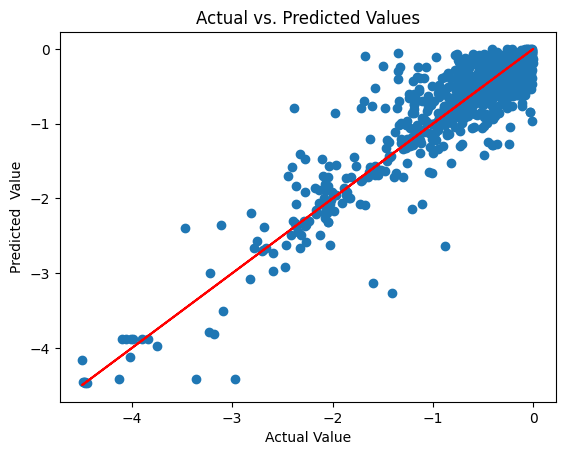

In [132]:
#put your code here
# Train the model
model = DecisionTreeRegressor(max_depth=25)
model.fit(X_train, y_train)
# Make predictions on the validation set
y_pred = model.predict(X_val)
# Calculate evaluation metrics on the validation set
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
print("Mean Squared Error VALIDATION:", mse)
print("R-squared VALIDATION:", r2)
# Make predictions on the TESTING set
y_pred = model.predict(X_test)
# Calculate evaluation metrics on the TESTING set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error TESTING:", mse)
print("R-squared TESTING:", r2)
# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test,color='r')
plt.xlabel("Actual Value")
plt.ylabel("Predicted  Value")
plt.title("Actual vs. Predicted Values")
plt.show()


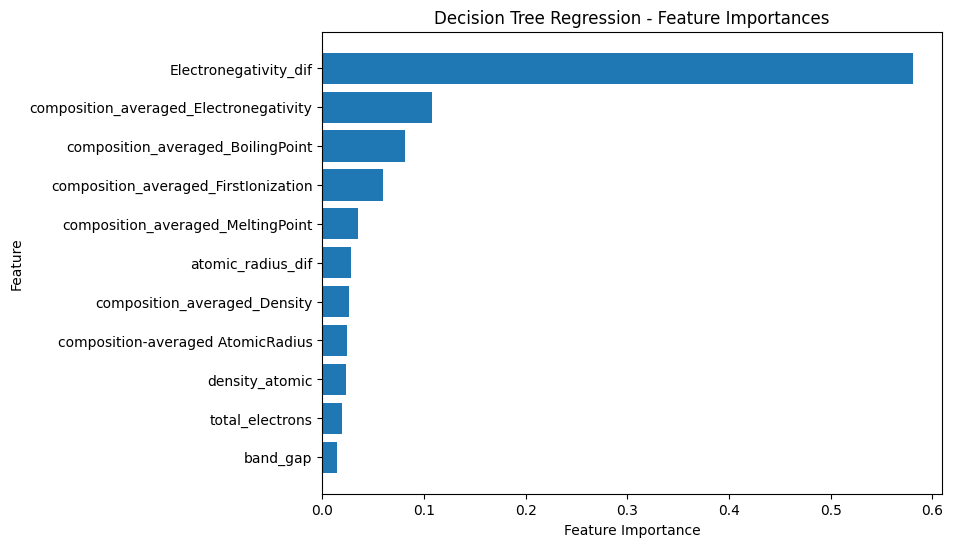

In [133]:
#put your code here
# Feature importances
feature_importances = model.feature_importances_
feature_names = X.columns
sorted_indices = feature_importances.argsort()

plt.figure(figsize=(8, 6))
plt.barh(range(len(feature_importances)), feature_importances[sorted_indices], align="center")
plt.yticks(range(len(feature_importances)), feature_names[sorted_indices])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Decision Tree Regression - Feature Importances")
plt.show()

# **Random Forest**

Mean Squared Error TRAIN: 0.006194086396815408
R-squared TRAIN: 0.9878415217917441


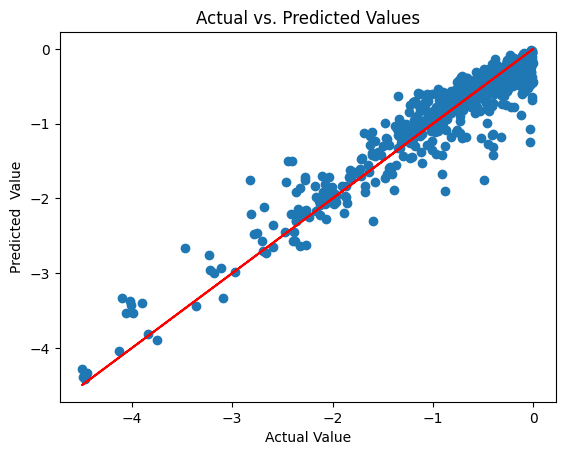

Mean Squared Error test: 0.04694896210431204
R-squared test: 0.9151681682009034


In [134]:
#put your code here
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
# Create and train the Random Forest regression model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the TRAIN set
y_pred = model.predict(X_train)

# Compute MSE and R-squared
mse_train = mean_squared_error(y_train, y_pred)
r2_train = r2_score(y_train, y_pred)

# Print the results
print("Mean Squared Error TRAIN:", mse_train)
print("R-squared TRAIN:", r2_train)


# Make predictions on the test set
y_pred = model.predict(X_test)
# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test,color='r')
plt.xlabel("Actual Value")
plt.ylabel("Predicted  Value")
plt.title("Actual vs. Predicted Values")
plt.show()
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)
# Print metrics
print("Mean Squared Error test:", mse_test)
print("R-squared test:", r2_test)

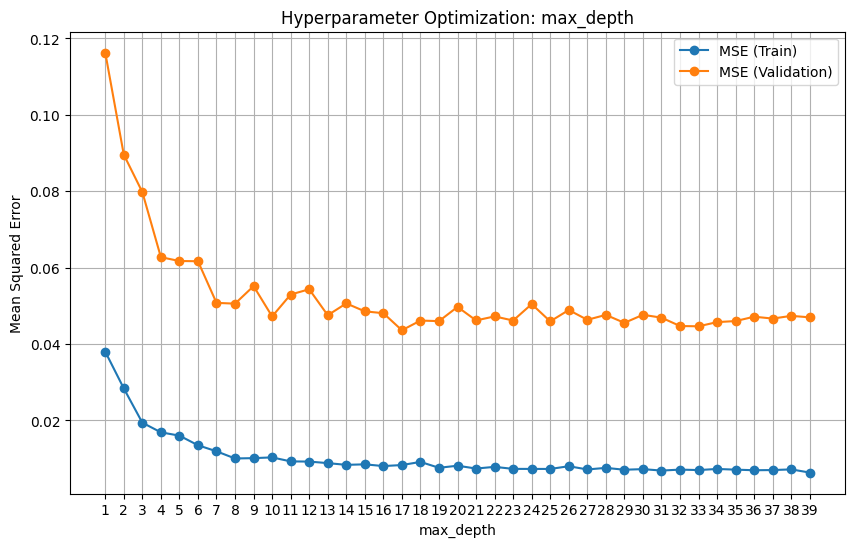

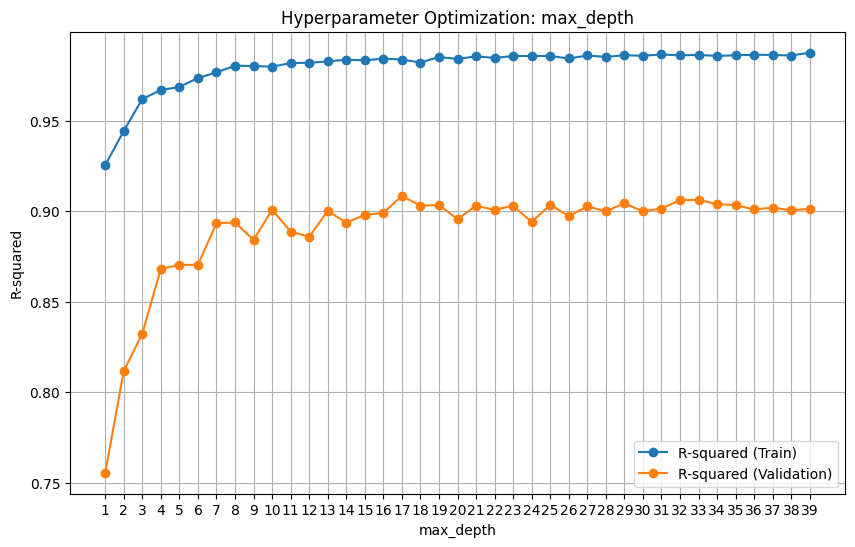

In [135]:
#put your code here
# Define a range of max_depth values to try
max_depth_values = range(1, 40)

# Initialize lists to store MSE and R-squared values for train, validation, and test sets
mse_train_values = []
r2_train_values = []
mse_val_values = []
r2_val_values = []
mse_test_values = []
r2_test_values = []

# Hyperparameter optimization loop
for max_depth in max_depth_values:
    # Create and train the decision tree regression model
    model = RandomForestRegressor(n_estimators=max_depth)
    model.fit(X_train, y_train)

    # Make predictions on the train set
    y_train_pred = model.predict(X_train)

    # Compute MSE and R-squared for train set
    mse_train = mean_squared_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)

    # Make predictions on the validation set
    y_val_pred = model.predict(X_val)

    # Compute MSE and R-squared for validation set
    mse_val = mean_squared_error(y_val, y_val_pred)
    r2_val = r2_score(y_val, y_val_pred)

    # Make predictions on the test set
    y_test_pred = model.predict(X_test)

    # Compute MSE and R-squared for test set
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Append the results to the lists
    mse_train_values.append(mse_train)
    r2_train_values.append(r2_train)
    mse_val_values.append(mse_val)
    r2_val_values.append(r2_val)
    mse_test_values.append(mse_test)
    r2_test_values.append(r2_test)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, mse_train_values, 'o-', label='MSE (Train)')
plt.plot(max_depth_values, mse_val_values, 'o-', label='MSE (Validation)')

plt.xlabel('max_depth')
plt.ylabel('Mean Squared Error')

plt.title('Hyperparameter Optimization: max_depth')
plt.xticks(max_depth_values)
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, r2_train_values, 'o-', label='R-squared (Train)')
plt.plot(max_depth_values, r2_val_values, 'o-', label='R-squared (Validation)')

plt.xlabel('max_depth')
plt.ylabel('R-squared')

plt.title('Hyperparameter Optimization: max_depth')
plt.xticks(max_depth_values)
plt.grid(True)
plt.legend()
plt.show()

Mean Squared Error TRAIN: 0.00616973859903185
R-squared TRAIN: 0.987889314500758
Mean Squared Error test: 0.046758223206405145
R-squared test: 0.9155128133086873


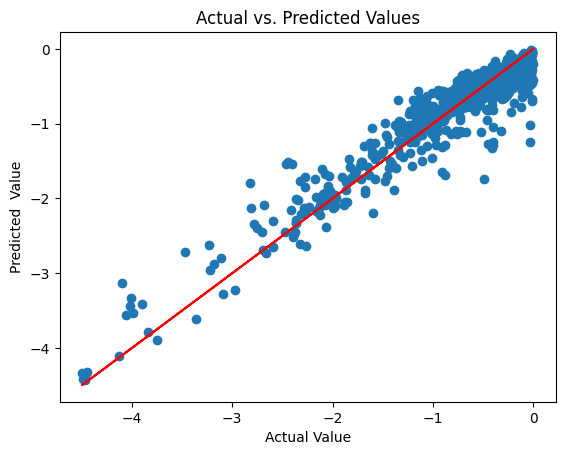

In [136]:
#put your code here
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
# Create and train the Random Forest regression model
model = RandomForestRegressor(max_depth=21)
model.fit(X_train, y_train)
# Make predictions on the TRAIN set
y_pred = model.predict(X_train)
# Compute MSE and R-squared
mse_train = mean_squared_error(y_train, y_pred)
r2_train = r2_score(y_train, y_pred)
# Print the results
print("Mean Squared Error TRAIN:", mse_train)
print("R-squared TRAIN:", r2_train)
# Make predictions on the test set
y_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)
# Print metrics
print("Mean Squared Error test:", mse_test)
print("R-squared test:", r2_test)
# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test,color='r')
plt.xlabel("Actual Value")
plt.ylabel("Predicted  Value")
plt.title("Actual vs. Predicted Values")
plt.show()

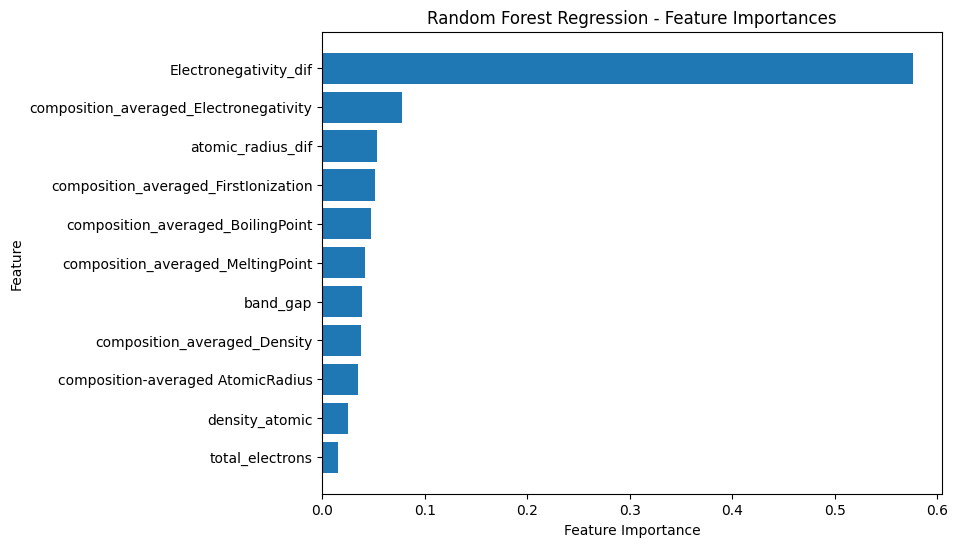

In [137]:
#put your code here

# Feature importances
feature_importances = model.feature_importances_
feature_names = X.columns
sorted_indices = feature_importances.argsort()

plt.figure(figsize=(8, 6))
plt.barh(range(len(feature_importances)), feature_importances[sorted_indices], align="center")
plt.yticks(range(len(feature_importances)), feature_names[sorted_indices])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest Regression - Feature Importances")
plt.show()

# **Classification**

# **Logistic regression**

In [138]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

data = mp_query
data['metallicity'] = data['band_gap'].apply(lambda x: 0 if x < 0.001 else 1)

# Split the dataset into training and testing sets
X = data.drop(['metallicity', 'band_gap'], axis=1)  # Features
y = data['metallicity']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear']  # Optimization algorithm
}

# Create the Logistic Regression model
model = LogisticRegression()

# Perform grid search using cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best model
best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)


# Make predictions on the testing set using the best model
y_pred = best_model.predict(X_test_scaled)
# Calculate testing accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", test_accuracy)

# Calculate and print the evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Training Accuracy: 0.8990046127700898
Testing Accuracy: 0.883495145631068
Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Precision: 0.8
Recall: 0.6984126984126984
F1-Score: 0.7457627118644068


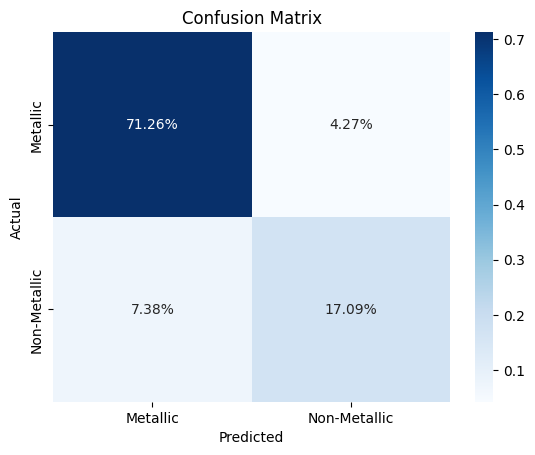

In [139]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix heatmap
sns.heatmap(cm/np.sum(cm), annot=True,
            fmt='.2%', cmap='Blues')


# Add labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks([0.5, 1.5], ['Metallic', 'Non-Metallic'])
plt.yticks([0.5, 1.5], ['Metallic', 'Non-Metallic'])


# Display the heatmap
plt.show()

In [140]:
# Get the coefficients of the logistic regression model
coefficients = best_model.coef_[0]

# Create a DataFrame to store the feature names and their corresponding coefficients
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

# Sort the DataFrame by the absolute values of the coefficients in descending order
feature_importance = feature_importance.reindex(feature_importance['Coefficient'].abs().sort_values(ascending=False).index)

# Print the top features with the strongest effects
print(feature_importance.head(10))


                                   Feature  Coefficient
2        composition-averaged AtomicRadius    -1.409654
9             composition_averaged_Density    -1.059466
0                           density_atomic     0.989647
6        composition_averaged_BoilingPoint    -0.738525
5     composition_averaged_FirstIonization    -0.410430
1                formation_energy_per_atom    -0.205350
10                         total_electrons     0.188194
8   composition_averaged_Electronegativity     0.084534
4                        atomic_radius_dif    -0.024840
3                    Electronegativity_dif     0.000000


# **Decision Tree**

In [141]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [None, 5, 10],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
}

# Create the Decision Tree Classifier
model = DecisionTreeClassifier()

# Perform grid search using cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Calculate training accuracy
y_train_pred =best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Calculate testing accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", test_accuracy)
# Make predictions on the testing set using the best model
y_pred = best_model.predict(X_test)

# Calculate and print the evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Training Accuracy: 0.961641175042486
Testing Accuracy: 0.883495145631068
Best Parameters: {'max_depth': 10, 'min_samples_split': 5}
Precision: 0.7740585774058577
Recall: 0.7341269841269841
F1-Score: 0.7535641547861507


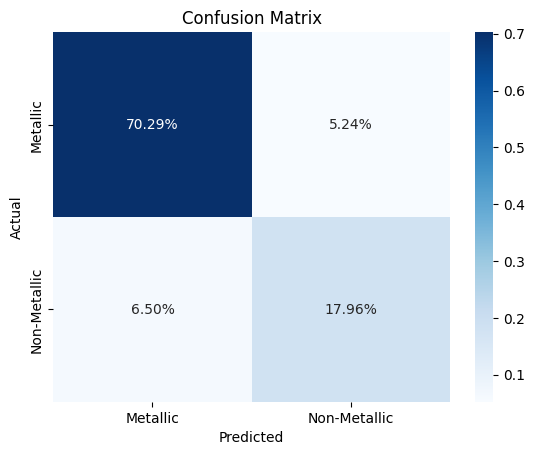

In [142]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix heatmap
sns.heatmap(cm/np.sum(cm), annot=True,
            fmt='.2%', cmap='Blues')


# Add labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks([0.5, 1.5], ['Metallic', 'Non-Metallic'])
plt.yticks([0.5, 1.5], ['Metallic', 'Non-Metallic'])

# Display the heatmap
plt.show()

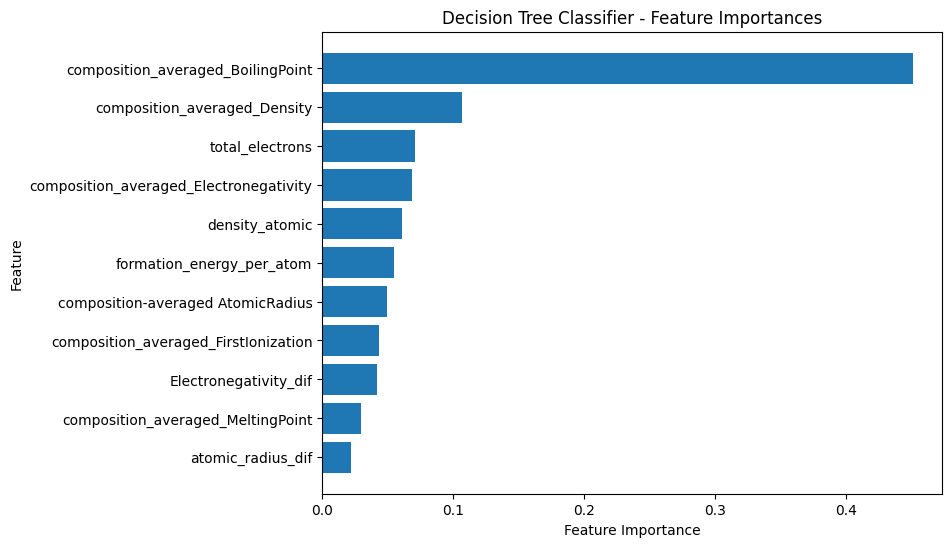

In [143]:
#put your code here

# Feature importances
feature_importances = best_model.feature_importances_
feature_names = X.columns
sorted_indices = feature_importances.argsort()

plt.figure(figsize=(8, 6))
plt.barh(range(len(feature_importances)), feature_importances[sorted_indices], align="center")
plt.yticks(range(len(feature_importances)), feature_names[sorted_indices])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Decision Tree Classifier - Feature Importances")
plt.show()

# **Random Forest Classifier**

In [144]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Train a Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Calculate training accuracy
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate testing accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", test_accuracy)

# Evaluate the model
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Training Accuracy: 0.9997572226268512
Testing Accuracy: 0.9106796116504854
Precision: 0.8389830508474576
Recall: 0.7857142857142857
F1-Score: 0.8114754098360656


In [145]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
}

# Create the Random Forest Classifier
model = RandomForestClassifier()


# Perform grid search using cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the testing set using the best model
y_pred = best_model.predict(X_test)
y_train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Calculate and print the evaluation metrics
test_accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("Testing Accuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Training Accuracy: 0.9939305656712795
Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Testing Accuracy: 0.9106796116504854
Precision: 0.8361344537815126
Recall: 0.7896825396825397
F1-Score: 0.8122448979591836


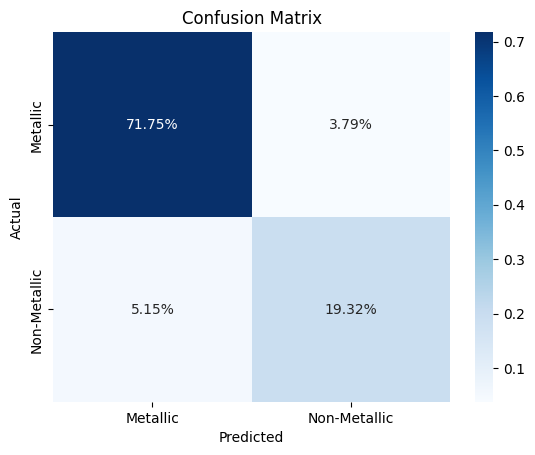

In [146]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix heatmap
sns.heatmap(cm/np.sum(cm), annot=True,
            fmt='.2%', cmap='Blues')


# Add labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks([0.5, 1.5], ['Metallic', 'Non-Metallic'])
plt.yticks([0.5, 1.5], ['Metallic', 'Non-Metallic'])

# Display the heatmap
plt.show()

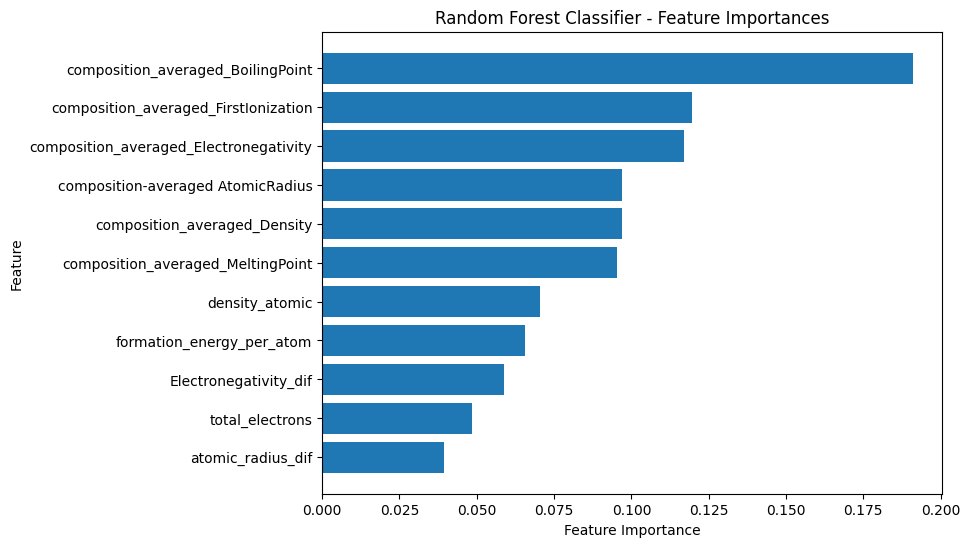

In [147]:
#put your code here

# Feature importances
feature_importances = best_model.feature_importances_
feature_names = X.columns
sorted_indices = feature_importances.argsort()

plt.figure(figsize=(8, 6))
plt.barh(range(len(feature_importances)), feature_importances[sorted_indices], align="center")
plt.yticks(range(len(feature_importances)), feature_names[sorted_indices])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest Classifier - Feature Importances")
plt.show()

# **4. Analyze the composition-property relationships.**



> There are 5149 unique compounds in my dataset, and they are well-balanced. For the regression model, I use linear regression, lasso, decision trees and random forests. For the classification model, I use logistic regression, decision trees and random forests The details are listed below:







**The strongest effect on formation energy:**



*   linear regression: composition_averaged_Electronegativity

---



*   lasso: Electronegativity_dif

---


*   decision trees: Electronegativity_dif

---




*   random forests: Electronegativity_dif



**The strongest effect on metallicity:**



*   logistic regression: composition_averaged_Density

---



*   decision trees: composition_averaged_BoilingPoint

---


*   random forests: composition_averaged_BoilingPoint

---




**What are the
features that do not contribute to your models?**



*   It was likely that other features did not contribute too much importance to the formation energy except electronegativity differences. Because the electronegativity difference affects the energy associated with bond formation. Larger electronegativity differences lead to stronger bonds with higher bond energies. The formation of stronger bonds releases more energy, lowering the overall formation energy of the compound. This is particularly evident in ionic compounds where the electrostatic attraction between oppositely charged ions contributes significantly to the stability and lower formation energy.

*   For the metallicity, it seems the composition_averaged_BoilingPoint contributes most importance. There were three reasons to explain this:



1.   Bonding Type: The boiling point is related to the strength of the intermolecular forces in a compound. In metallic compounds, the bonding is characterized by a sea of delocalized electrons, which allows for high thermal conductivity and electrical conductivity. Metallic bonds are generally weaker compared to ionic or covalent bonds, resulting in lower boiling points for most metals.

1.   Metallic vs. Non-Metallic Elements: The boiling point of a compound can be influenced by the nature of the elements involved. In general, metallic elements have lower boiling points compared to non-metallic elements. This is because metallic bonding involves the delocalization of electrons, which leads to weaker intermolecular forces. Non-metallic compounds, on the other hand, often have higher boiling points due to stronger intermolecular forces such as hydrogen bonding or dipole-dipole interactions.
2.   Thermal Energy: The boiling point is the temperature at which a compound transitions from a liquid phase to a gaseous phase. It represents thermal energy required to overcome the intermolecular forces and convert the substance into a gas. Metallicity is associated with the presence of metallic bonds, which are generally characterized by high thermal conductivity and high electrical conductivity. This implies that metallic compounds have lower boiling points as they can easily break apart their metallic bonds and transition into the gaseous phase.








**What kind of information about materials (i.e., new features) can improve the predictive power of your model but is not available?**



*   I think the bonding energy of the chemical bond formed in the compound and the crystal structure will affect the formation energy. Also, crystal structure and electron delocalization influence the metallicity. These all contribute to improving the predictive power of my models




# **LINK**

https://github.com/sinhoodoowu/MATL-6970-Machine-Learning-and-Materials/blob/main/Final_project_Shuai_Wu.ipynb